# stock3_mplfinance
## 概要
* yahoo financeより株価データを取得する
* mplfinanceを用いてグラフ化する
  * ローソク足をグラフ化する
  * ローソク足グラフに、出来高、ボリンジャーバンド、MACD、RSIを追加する
  * グラフ画像をファイル保存する
## 参考
### キノコード：株価のデータ分析(3)
* https://youtu.be/CVwJjclreSU
* https://kino-code.com/python_finance-01/
### install packages
* pip install pandas_datareader
* pip install mplfinance
* TA-Libのインストール:https://optrip.xyz/?p=2242

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import mplfinance as mpf
import talib as ta
import warnings
warnings.simplefilter('ignore')

In [2]:
# 日経平均データ（~N225）の取得
ticker = '^N225'
start = '2020-01-01'
end = '2020-06-30'

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


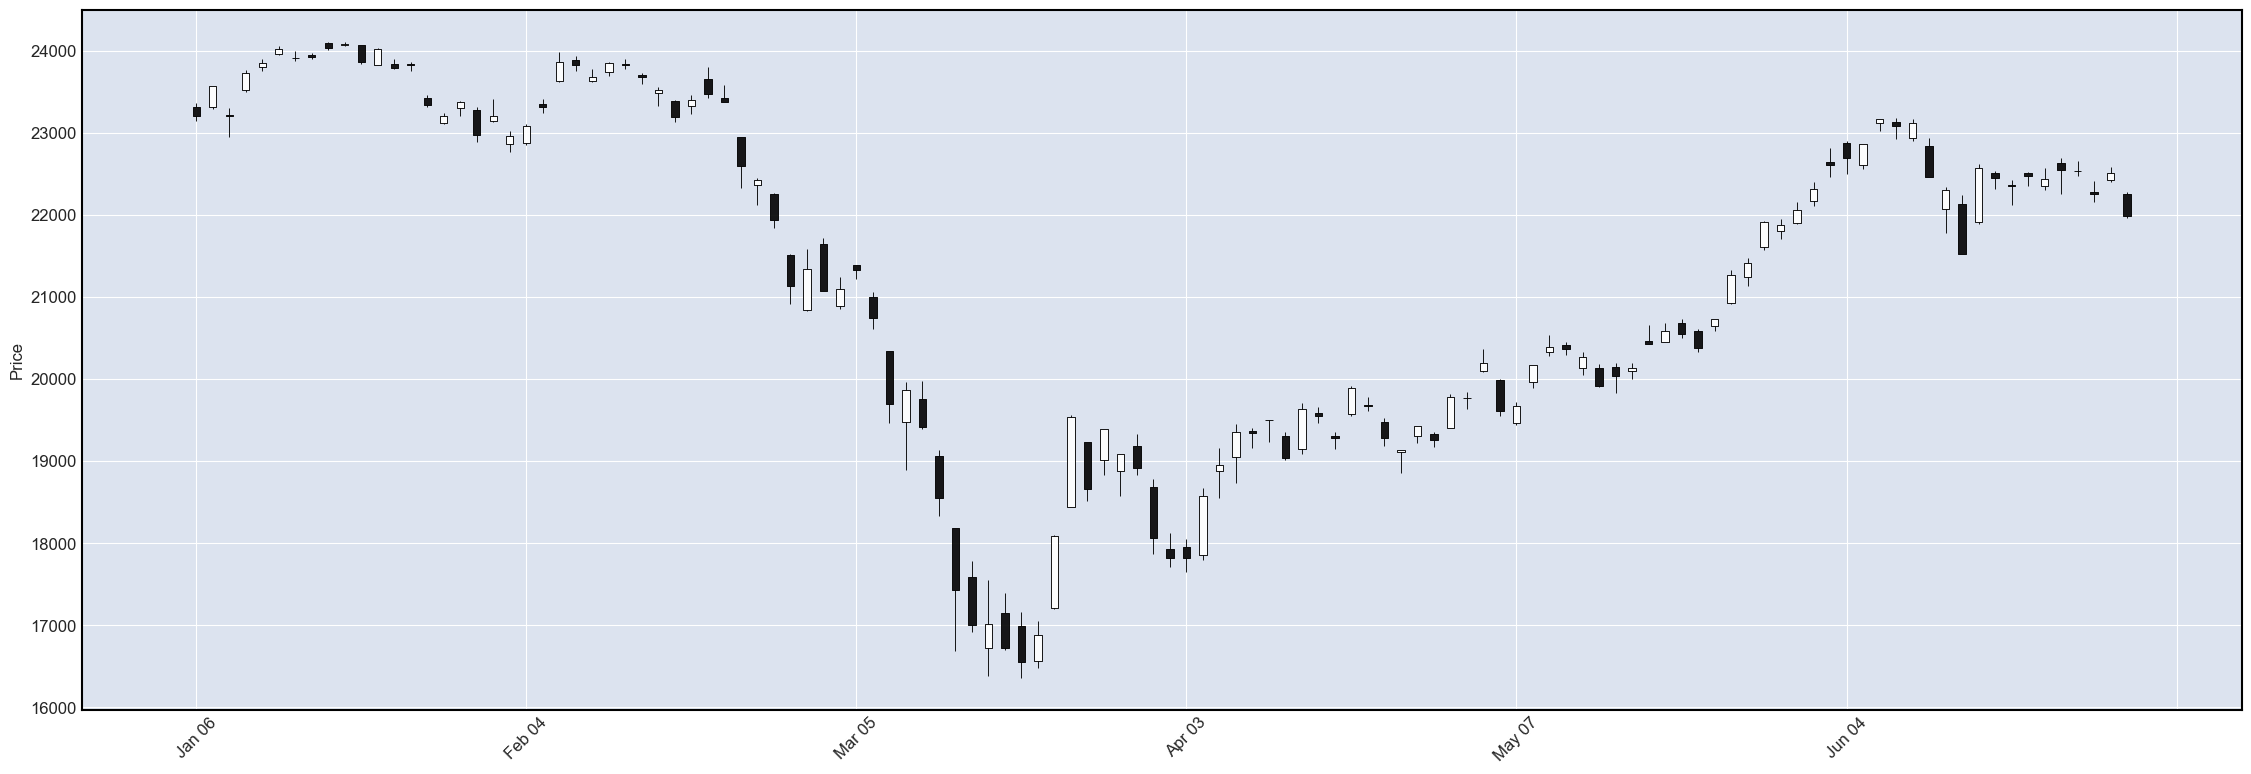

In [3]:
# ローソク足グラフの作成
mpf.plot(df, type='candle', figsize=(30,10)) 

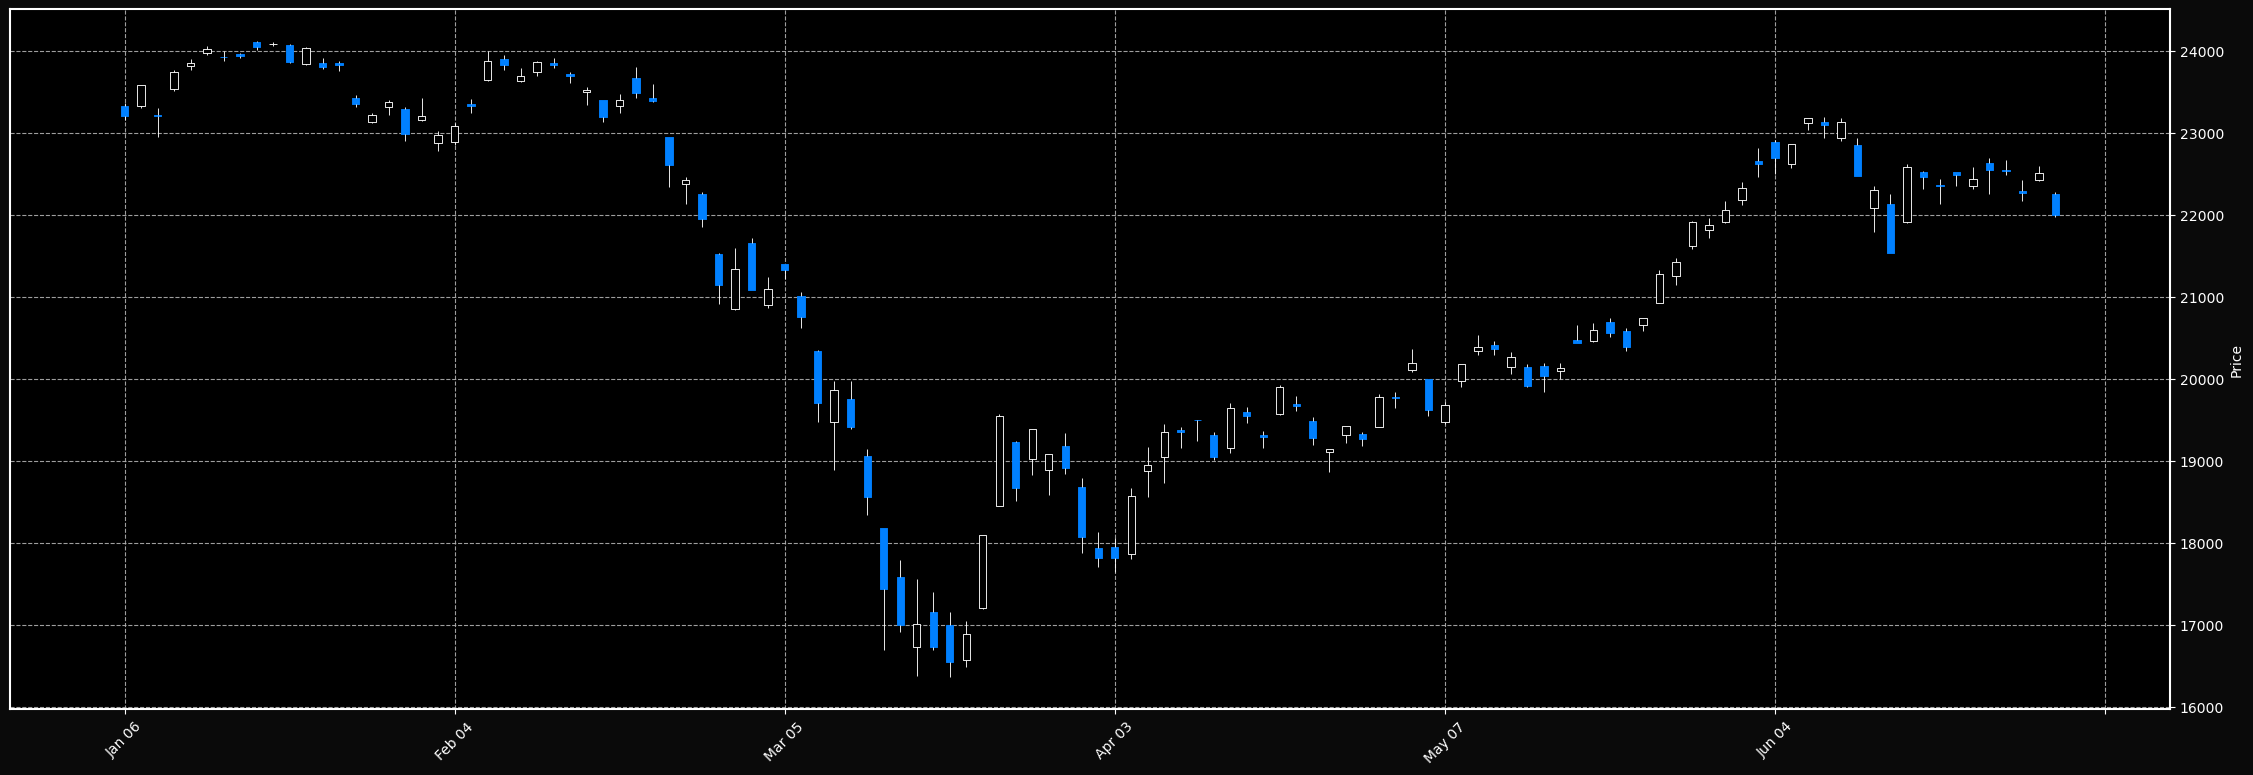

In [4]:
# グラフスタイルの変更
mpf.plot(df, type='candle', figsize=(30,10), style='mike') 

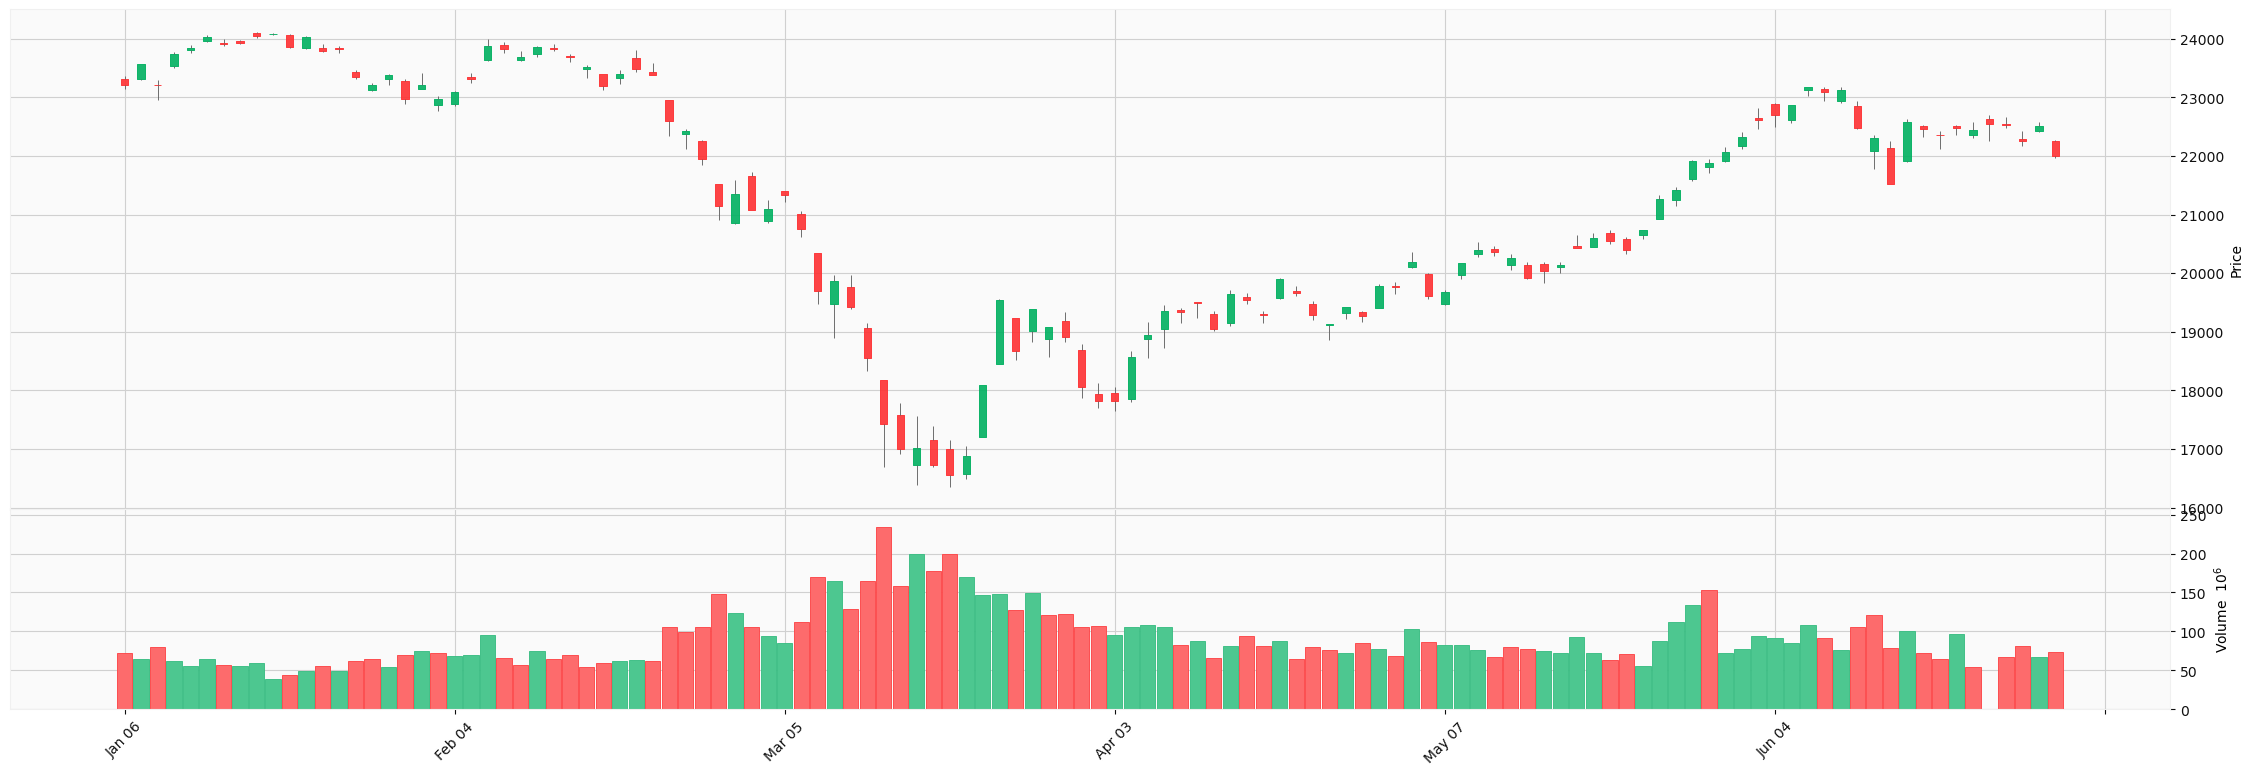

In [5]:
# 出来高の追加
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', volume=True) 

In [6]:
# ボリンジャーバンド用データの作成
df["upper"], df["middle"], df["lower"] = ta.BBANDS(df['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

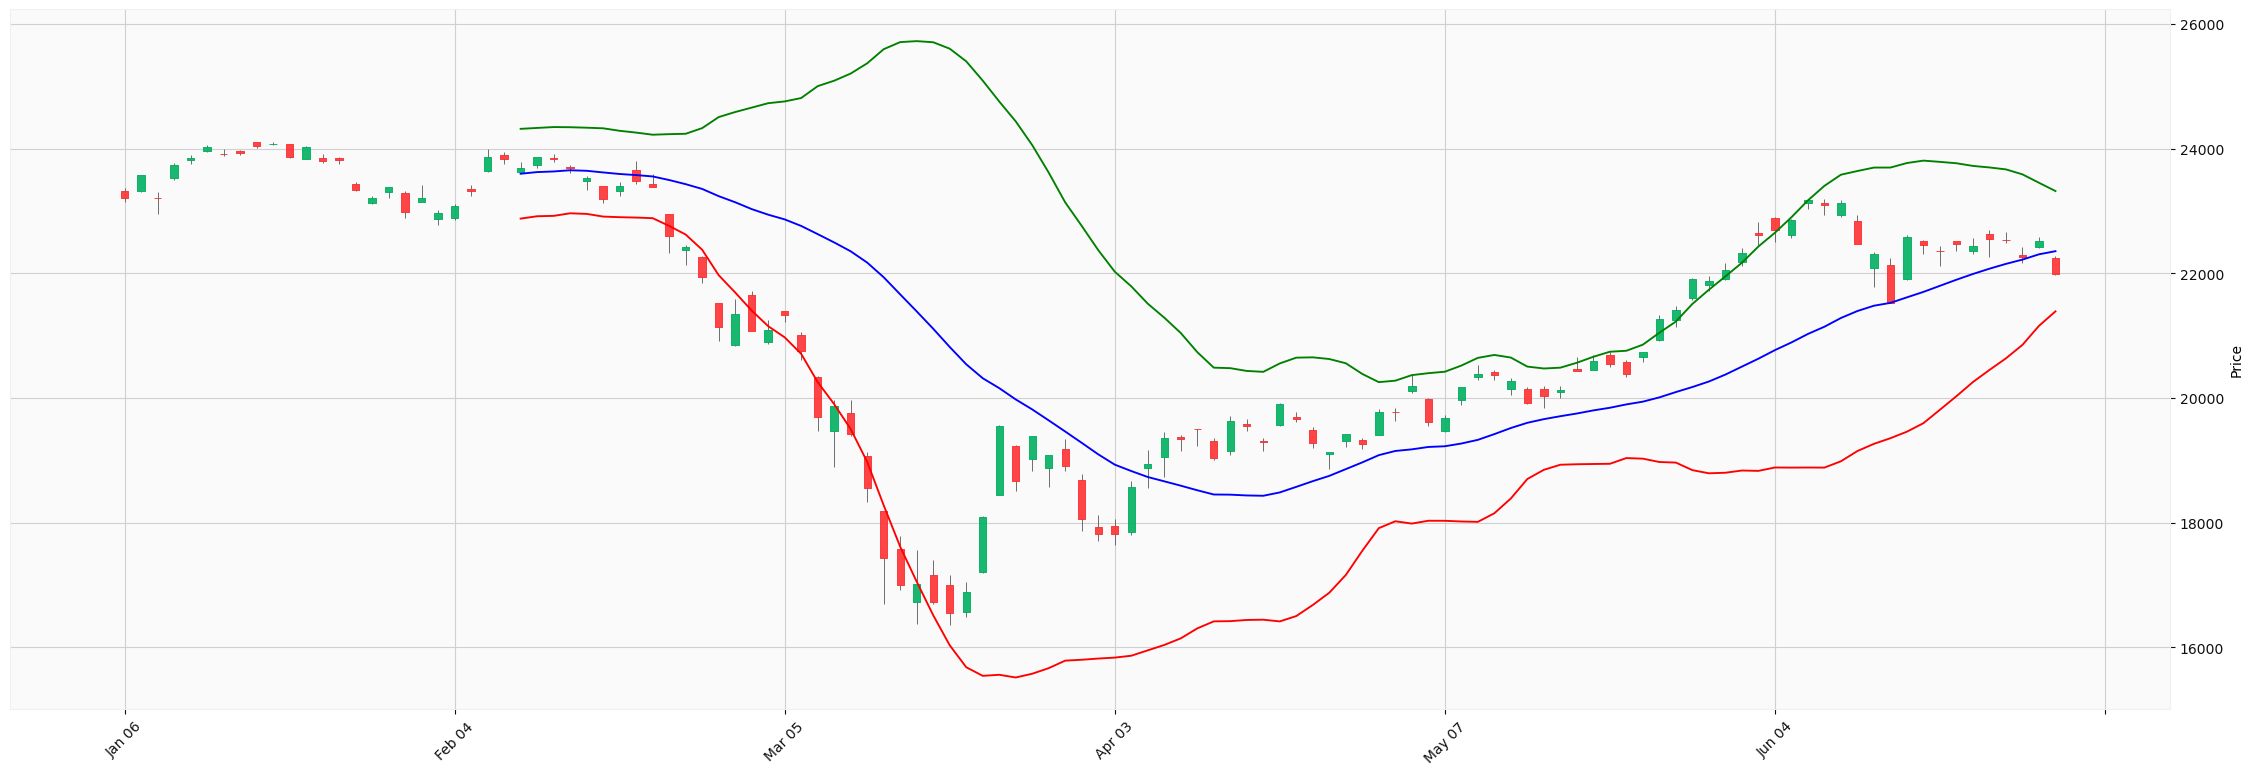

In [7]:
apds = [mpf.make_addplot(df['upper'],color='g'),  
        mpf.make_addplot(df['middle'],color='b'),
        mpf.make_addplot(df['lower'],color='r')
       ]

mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', addplot=apds)

In [8]:
# MACD用データの作成
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

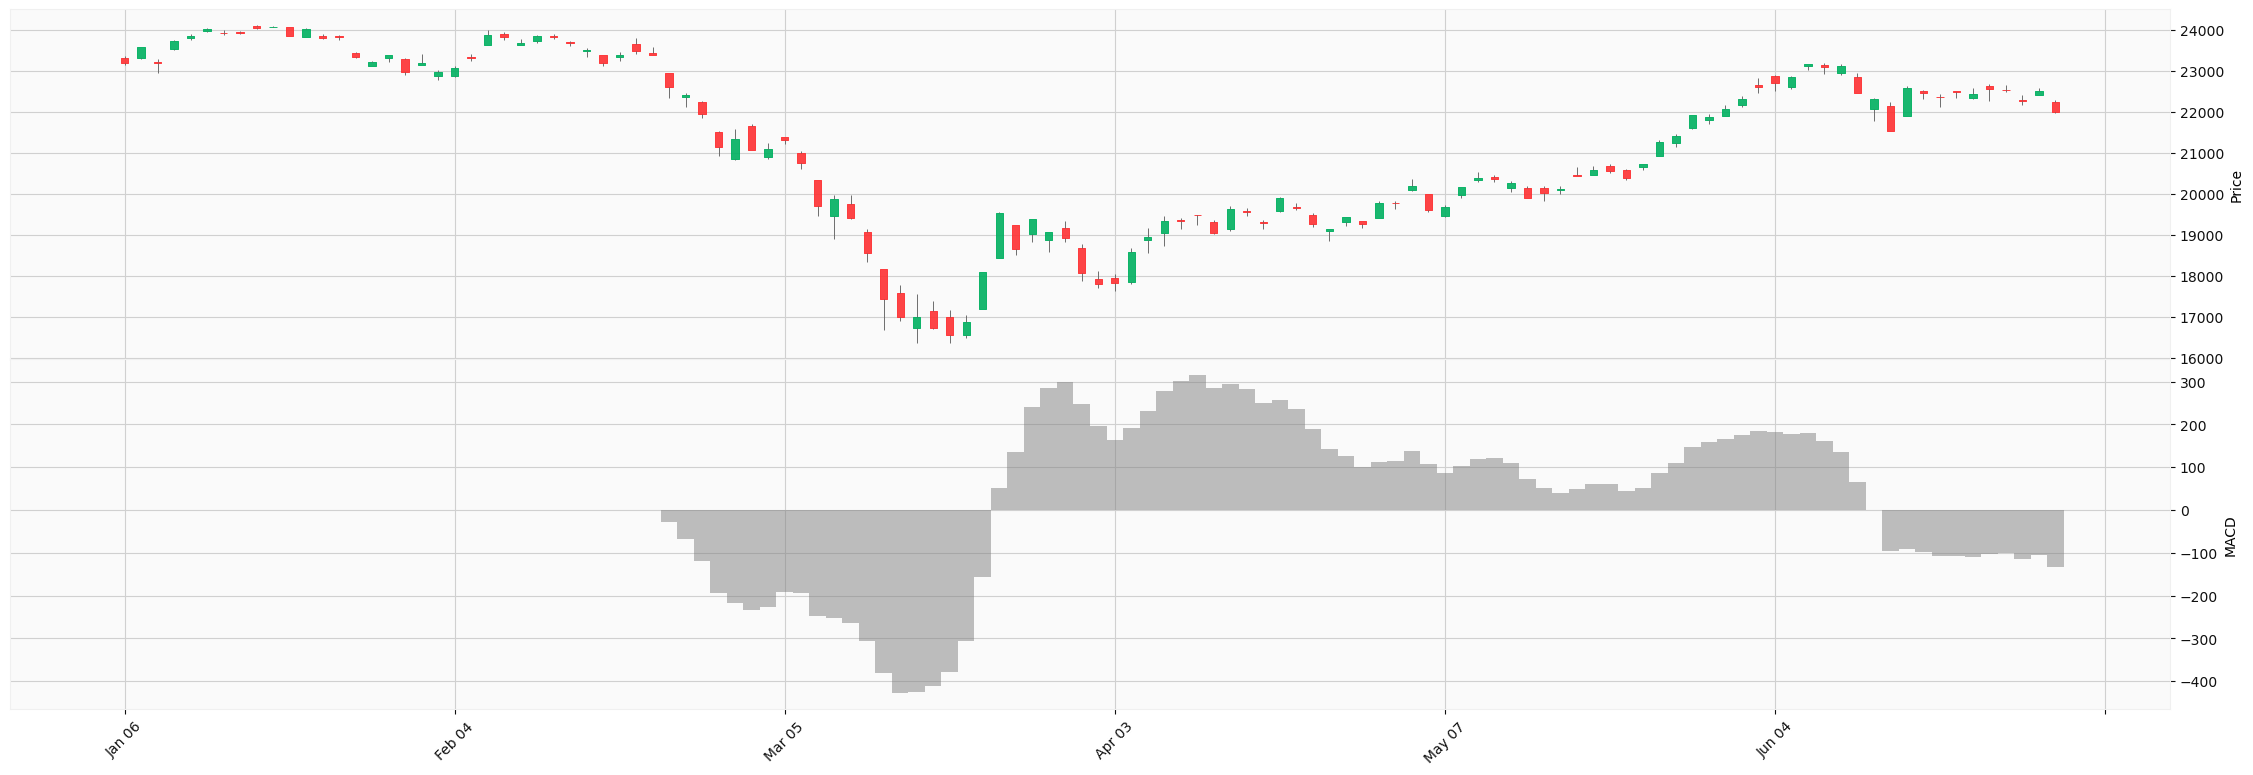

In [9]:
apds = [mpf.make_addplot(df['macdhist'], type='bar', width=1.0, panel=1, color='gray', alpha=0.5, ylabel='MACD')]

#mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds, volume_panel=2, panel_ratios=(3,1,1))
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', addplot=apds, panel_ratios=(1,1))

In [10]:
# RSI用データの作成
df["RSI"] = ta.RSI(df["Adj Close"], timeperiod=25)

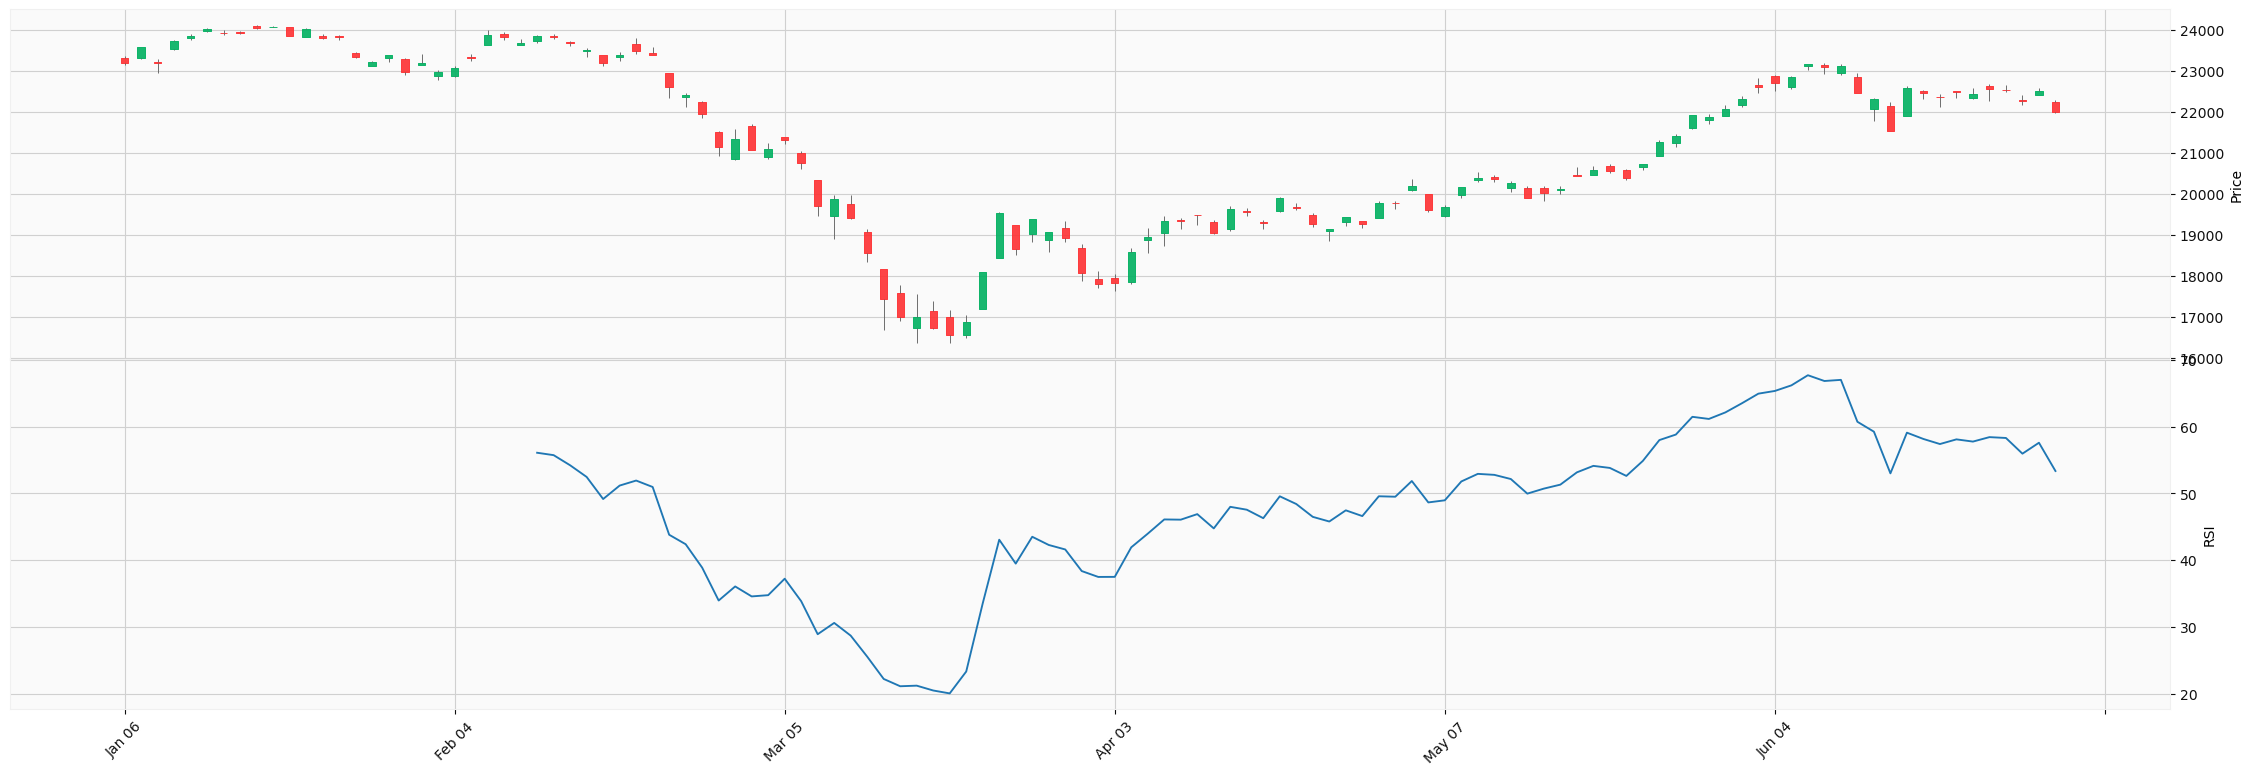

In [11]:
apds = [mpf.make_addplot(df['RSI'], panel=1, type='line', ylabel='RSI')]

#mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds, volume_panel=3, panel_ratios=(5,2,2,1))
mpf.plot(df, type='candle', figsize=(30,10), style='yahoo', addplot=apds, panel_ratios=(1,1))   

In [12]:
# グラフ画像のファイル保存
mpf.plot(df, type='candle', addplot=apds, figsize=(30,10), style='yahoo',
         volume=True, volume_panel=2,panel_ratios=(1,1,1), savefig='technical.png')